In [1]:
import pandas as pd
from matplotlib import font_manager, rc
import matplotlib.pyplot as plt
from datetime import datetime

# 한글 깨짐
font_path = 'C:\WINDOWS\FONTS\MALGUN.ttf'
font = font_manager.FontProperties(fname = font_path).get_name()
rc('font', family = font)

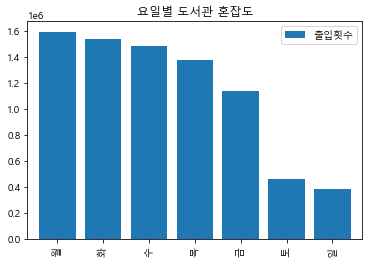

In [2]:
# 출입일시 csv 파일 불러오기
lib_entry_exit = pd.read_csv("./데이터_도서관출입.csv", encoding = "cp949")
# lib_entry_exit.head()

# 출입일시만 가져온 새로운 데이터 프레임 생성
# only_entry_exit = lib_entry_exit.loc[:,'출입일시']

# 출입일시에서 날짜만 가져온 새로운 데이터 프레임 생성
only_entry_exit = lib_entry_exit.loc[:,'출입일시'].str[0:10]

# weekday()에서 사용할 숫자별 요일 딕셔너리 생성
# dateDict = {0: '월', 1 : '화', 2 : '수', 3 : '목', 4 : '금' , 5 : '토', 6 : '일'}


# 각 요일에 해당하는 출입일시만 추출
lib_mon = []
lib_tue = []
lib_wed = []
lib_thu = []
lib_fri = []
lib_sat = []
lib_sun = []

for i in only_entry_exit:
    datetime_d = datetime.strptime(i, '%Y/%m/%d')
    if datetime_d.weekday() == 0:
        lib_mon.append(i)
    elif datetime_d.weekday() == 1:
        lib_tue.append(i)
    elif datetime_d.weekday() == 2:
        lib_wed.append(i)
    elif datetime_d.weekday() == 3:
        lib_thu.append(i)
    elif datetime_d.weekday() == 4:
        lib_fri.append(i)
    elif datetime_d.weekday() == 5:
        lib_sat.append(i)
    elif datetime_d.weekday() == 6:
        lib_sun.append(i)


# 요일별 출입횟수를 추출한 DataFrame
day_of_week = ['월','화','수','목','금','토','일']
week_entry_exit = pd.DataFrame(index=day_of_week,columns=['출입횟수'])

week_entry_exit['출입횟수'][0] = len(lib_mon)
week_entry_exit['출입횟수'][1] = len(lib_tue)
week_entry_exit['출입횟수'][2] = len(lib_wed)
week_entry_exit['출입횟수'][3] = len(lib_thu)
week_entry_exit['출입횟수'][4] = len(lib_fri)
week_entry_exit['출입횟수'][5] = len(lib_sat)
week_entry_exit['출입횟수'][6] = len(lib_sun)

# print(week_entry_exit)

# 시각화 - 막대그래프
congestion_bar = week_entry_exit.plot.bar(width = 0.8, title = '요일별 도서관 혼잡도')
plt.show()

In [8]:
# 출입횟수를 기준으로 내림차순 정렬
week_entry_exit.sort_values(by=['출입횟수'], axis = 0, ascending=False)

,출입횟수
월,1592175
화,1536446
수,1482073
목,1374593
금,1137231
토,462004
일,379729
